# "FOUR-CLASS SPIRAL PROBLEM" - project

Batyr Kenzheakhmetov (000801267)




# Experiment I:

# DNN model - Batyr

Before I started using Evolutionary Computing technologies, I decided to build a regular DNN based on the Deep Learning principle. As I was creating the model, I started changing the hyperparameters to suit our problem. I created a fairly simple model with only three hidden layers (128, 64, 32 hidden neurons in them) with a 30% probability of random neurons being dropped. By the end of training, the result for the test date is **95% accuracy, 0.27 loss**. This is one of the highest results I have ever achieved (**the maximum was 96.5%**), and the reason for such a successful result is an increase in the number of epochs by 150 (with a further increase in epochs, the result usually does not improve).

Based on this, I came to the conclusion that in order to be able to fully consider this problem as a serious project, it is necessary to set clear restrictions on the number of epochs or change the type of data being learned to more complex ones.

For now, I've decided to reduce the number of epochs to 50, and challenge our team to achieve the same high accuracy result, or even higher.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from random import random, gauss, seed

def get_rands(mean, var):
  t = random()*10
  xi_x = gauss(mean, var)
  xi_y = gauss(mean, var)
  return t, xi_x, xi_y

#points indicate points per class
def generate_class(mean, var, points, b = 0.0, a = 0.1, mult = 1.0):
  x = []
  y = []
  for point in range(points):
    t, xi_x, xi_y = get_rands(mean, var)
    x.append(mult*a*t*np.cos(t+b)+xi_x)
    y.append(mult*a*t*np.sin(t+b)+xi_y)
  x = np.array(x)
  y = np.array(y)
  return np.column_stack((x,y))


# Re-run data generation code to ensure data is available
seed(24)
points = 200  # points per class
var = 0.03
class_1 = generate_class(0.0, var, points, a=0.1, mult=1.0, b=0.0)
class_2 = generate_class(0.0, var, points, a=0.1, mult=1.0, b=np.pi/2)
class_3 = generate_class(0.0, var, points, a=0.1, mult=1.0, b=np.pi)
class_4 = generate_class(0.0, var, points, a=0.1, mult=1.0, b=3*np.pi/2)

X = np.concatenate((class_1, class_2, class_3, class_4), axis=0)
y = np.concatenate((
    np.zeros(points),
    np.ones(points),
    np.ones(points) * 2,
    np.ones(points) * 3
)).astype(int)

# Convert labels to one-hot encoding
y = to_categorical(y, num_classes=4)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [125]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# Define the model
model = Sequential([
    Dense(128, input_shape=(2,), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')  # 4 output classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                     │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_48 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_49 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,852 (42.39 KB)

 Trainable params: 10,852 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

In [126]:
# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.2714 - loss: 1.3837 - val_accuracy: 0.4062 - val_loss: 1.3722
Epoch 2/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3003 - loss: 1.3757 - val_accuracy: 0.3500 - val_loss: 1.3607
Epoch 3/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3190 - loss: 1.3629 - val_accuracy: 0.3562 - val_loss: 1.3534
Epoch 4/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3438 - loss: 1.3653 - val_accuracy: 0.3688 - val_loss: 1.3509
Epoch 5/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3550 - loss: 1.3608 - val_accuracy: 0.3375 - val_loss: 1.3476
Epoch 6/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3607 - loss: 1.3579 - val_accuracy: 0.3750 - val_loss: 1.3445
Epoch 7/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3758 - loss: 1.3386 - val_accuracy: 0.3750 - val_loss: 1.3485
Epoch 8/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3276 - loss: 1.3488 - val_accuracy: 0.3375 - 

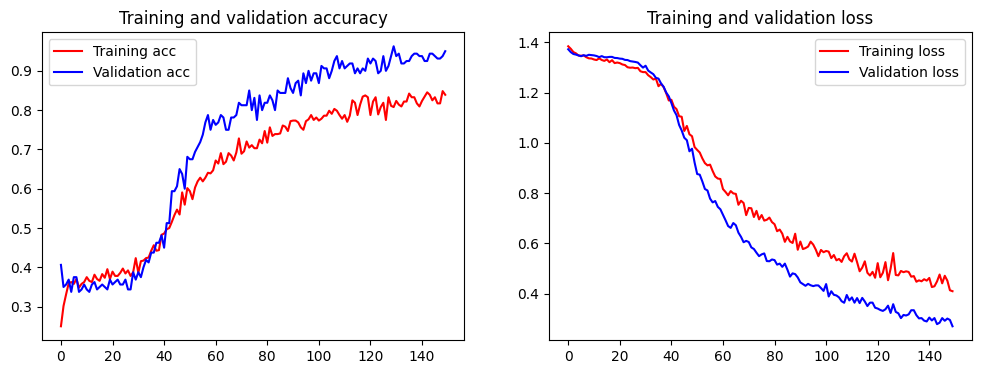

In [127]:
import matplotlib.pyplot as plt

# Assuming history.history contains the training/validation data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

# Update to use solid lines
ax1.plot(epochs, acc, 'r-', label='Training acc')  # Red solid line for training accuracy
ax1.plot(epochs, val_acc, 'b-', label='Validation acc')  # Blue solid line for validation accuracy
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'r-', label='Training loss')  # Red solid line for training loss
ax2.plot(epochs, val_loss, 'b-', label='Validation loss')  # Blue solid line for validation loss
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()


In [128]:
# Evaluate the model I
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9582 - loss: 0.2617  
Test Loss: 0.2707010805606842, Test Accuracy: 0.949999988079071


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


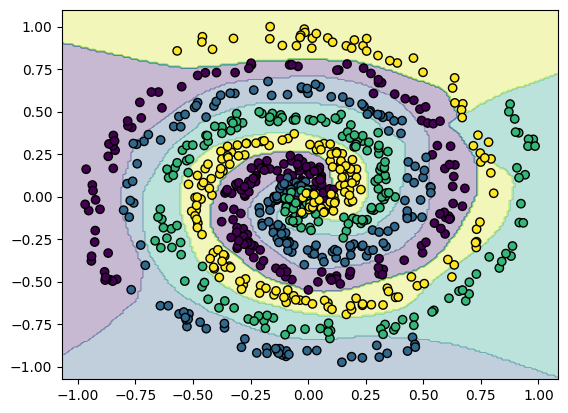

In [129]:
import matplotlib.pyplot as plt

# Plot the decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid)
    Z = np.argmax(probs, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=np.argmax(y, axis=1), edgecolor='k')
    plt.show()

# Plotting the decision boundary
plot_decision_boundary(model, X, y)

# Experiment II:

# Using DEAP Library - Batyr

**The hyperparameters—number of neurons, learning rate, batch size, and dropout rate**—are constrained within defined ranges. Using the DEAP framework, individuals (representing hyperparameter sets) are initialized, and a population evolves over **5 generations to minimize the NN's loss**. The GA employs tournament selection, blend crossover, and Gaussian mutation, with bounds enforced to keep parameters valid.

A fitness evaluation function builds and trains a Keras Sequential model based on each individual's parameters, using categorical crossentropy loss, Adam optimizer, and EarlyStopping to prevent overfitting. The loss is used as the fitness value, and accuracy is logged for analysis. Each generation logs statistics on minimum loss, average loss, maximum accuracy, and average accuracy.

After completing the GA, the script identifies and outputs the best-performing hyperparameter set along with its loss and accuracy. This approach automates neural network tuning, leveraging evolutionary techniques for optimal performance while providing detailed logging to track progress.

In [131]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 11.6 MB/s eta 0:00:00


In [6]:
import random as py_random
from keras.callbacks import EarlyStopping
from deap import base, creator, tools, algorithms


# Define Genetic Algorithm components
LOW = [10, 0.001, 8, 0]  # num_neurons_layer1, lr, batch_size, dropout
HIGH = [250, 0.1, 64, 0.5]
N_VAR = len(LOW)

if "FitnessMin" in creator.__dict__:
    del creator.FitnessMin
if "Individual" in creator.__dict__:
    del creator.Individual


# Use a single weight (-1.0) to minimize only loss
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

toolbox.register("attr_float", py_random.uniform, LOW[0], HIGH[0])
toolbox.register("attr_lr", py_random.uniform, LOW[1], HIGH[1])
toolbox.register("attr_batch", py_random.uniform, LOW[2], HIGH[2])
toolbox.register("attr_dropout", py_random.uniform, LOW[3], HIGH[3])


toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_float, toolbox.attr_lr, toolbox.attr_batch, toolbox.attr_dropout), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Fitness evaluation function
def eval_function(params):
    neurons = int(np.clip(params[0], LOW[0], HIGH[0]))  # Ensure neurons are positive
    lr = params[1]
    batch_size = int(np.clip(params[2], LOW[2], HIGH[2]))  # Ensure batch size is valid
    dropout_rate = np.clip(params[3], 0, 1)  # Dropout rate must be in [0, 1]

    model = Sequential([
        Dense(neurons, input_shape=(2,), activation='relu'),
        Dropout(dropout_rate),
        Dense(neurons // 2, activation='relu'),
        Dense(4, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=0, validation_data=(X_test, y_test), callbacks=[es])
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    return loss, acc




toolbox.register("evaluate", eval_function)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)


def check_bounds(individual):
    individual[0] = int(np.clip(individual[0], LOW[0], HIGH[0]))  # Neurons
    individual[1] = np.clip(individual[1], LOW[1], HIGH[1])  # Learning rate
    individual[2] = int(np.clip(individual[2], LOW[2], HIGH[2]))  # Batch size
    individual[3] = np.clip(individual[3], 0, 1)  # Dropout rate
    return individual

toolbox.decorate("mutate", tools.DeltaPenalty(check_bounds, 0))

def assign_fitness(individual):
    loss, acc = eval_function(individual)
    individual.fitness.values = (loss,)  # Assign only loss to fitness
    return loss, acc  # Return both loss and accuracy for logging


# Main GA execution
def main():
    population = toolbox.population(n=10)

    # Statistics for loss
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min_loss", lambda val: min(v[0] for v in val))
    stats.register("avg_loss", lambda val: np.mean([v[0] for v in val]))

    # Accuracy tracking
    accuracy_log = tools.Logbook()
    accuracy_log.header = "gen", "max_acc", "avg_acc"

    # Run the genetic algorithm
    for gen in range(5):  # Number of generations
        # Evaluate population
        for ind in population:
            assign_fitness(ind)  # Assign fitness based on loss

        # Gather stats
        fits = [ind.fitness.values[0] for ind in population]  # Loss values
        accs = [assign_fitness(ind)[1] for ind in population]  # Accuracy values
        min_loss = min(fits)
        avg_loss = np.mean(fits)
        max_acc = max(accs)
        avg_acc = np.mean(accs)

        # Log accuracy
        accuracy_log.record(gen=gen, max_acc=max_acc, avg_acc=avg_acc)
        print(f"Generation {gen}: Min Loss = {min_loss}, Avg Loss = {avg_loss}, Max Acc = {max_acc}, Avg Acc = {avg_acc}")

        # Selection, crossover, mutation
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if py_random.random() < 0.5:  # Crossover probability
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
                check_bounds(child1)
                check_bounds(child2)

        for mutant in offspring:
            if py_random.random() < 0.3:  # Mutation probability
                toolbox.mutate(mutant)
                del mutant.fitness.values
                check_bounds(mutant)

        population[:] = offspring  # Replace old population

    return population, accuracy_log




if __name__ == "__main__":
    final_population, accuracy_log = main()

    best_individual = tools.selBest(final_population, k=1)[0]
    print("Best Individual:", best_individual)
    print(f"Best Loss: {best_individual.fitness.values[0]}")
    print(f"Best Accuracy: {assign_fitness(best_individual)[1]}")

    # Print accuracy log
    print("\nAccuracy Log:")
    for record in accuracy_log:
        print(record)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Generation 0: Min Loss = 0.2357354611158371, Avg Loss = 1.0353403672575952, Max Acc = 0.918749988079071, Avg Acc = 0.521875
Generation 1: Min Loss = 0.23523536324501038, Avg Loss = 0.7470834344625473, Max Acc = 0.9437500238418579, Avg Acc = 0.6306250065565109
Generation 2: Min Loss = 0.27257493138313293, Avg Loss = 0.6457252204418182, Max Acc = 0.949999988079071, Avg Acc = 0.7306249976158142
Generation 3: Min Loss = 0.2586187720298767, Avg Loss = 0.5956135481595993, Max Acc = 0.9312499761581421, Avg Acc = 0.7550000011920929
Generation 4: Min Loss = 0.1924622803926468, Avg Loss = 0.3553700312972069, Max Acc = 0.96875, Avg Acc = 0.8618750035762787
Best Individual: [222, 0.00901523101714458, 32, 0.010784952691840512]
Best Loss: 0.1746867597103119
Best Accuracy: 0.956250011920929

Accuracy Log:
{'gen': 0, 'max_acc': 0.918749988079071, 'avg_acc': 0.521875}
{'gen': 1, 'max_acc': 0.9437500238418579, 'avg_acc': 0.6306250065565109}
{'gen': 2, 'max_acc': 0.949999988079071, 'avg_acc': 0.730624997

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict(grid)
    Z = np.argmax(probs, axis=1).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=np.argmax(y, axis=1), edgecolor='k', cmap="coolwarm")
    plt.title("Decision Boundary of the Best Model")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

if __name__ == "__main__":
    final_population, accuracy_log = main()

    # Get the best individual
    best_individual = tools.selBest(final_population, k=1)[0]
    print("Best Individual:", best_individual)
    print(f"Best Loss: {best_individual.fitness.values[0]}")
    best_model_loss, best_model_acc = assign_fitness(best_individual)
    print(f"Best Accuracy: {best_model_acc}")

    # Build the model with the best individual's parameters
    neurons = int(np.clip(best_individual[0], LOW[0], HIGH[0]))
    lr = best_individual[1]
    batch_size = int(np.clip(best_individual[2], LOW[2], HIGH[2]))
    dropout_rate = np.clip(best_individual[3], 0, 1)

    best_model = Sequential([
        Dense(neurons, input_shape=(2,), activation='relu'),
        Dropout(dropout_rate),
        Dense(neurons // 2, activation='relu'),
        Dense(4, activation='softmax')
    ])

    best_model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
    best_model.fit(X_train, y_train, epochs=50, batch_size=batch_size, verbose=0, validation_data=(X_test, y_test))

    # Plot the decision boundary of the best model
    plot_decision_boundary(best_model, X_test, y_test)



# Result summarization

The genetic algorithm successfully optimized the neural network hyperparameters over 5 generations, showing consistent improvement in loss and accuracy. To make the task more challenging, I decided to reduce the number of epochs from 150 to 50. However, I was able to get great results with the potential to get even better.

Current results:

**Parameters: [222 neurons, learning rate 0.0090, batch size 32, dropout rate 0.0108]**

It gives as a performance: **95.63% accuracy and 0.1747 loss**, which is not the best possible result.

Overall, during the training process, the model improved its maximum accuracy and average accuracy with each generation:

*   Maximum Accuracy improved steadily from 91.87% in Generation 0 to 96.88% in Generation 4.
*   Average Accuracy rose significantly, starting at 52.19% and reaching 86.19% in the final generation.